<a href="https://colab.research.google.com/github/k-dinakaran/Text-to-Image-generator/blob/main/text_to_image_generator_to_3D_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate torch safetensors imageio

In [2]:
import os
os.environ['SPCONV_ALGO'] = 'native'  # Use 'native' for faster execution

In [3]:
!pip install torch torchvision torchaudio
!pip install diffusers transformers accelerate safetensors imageio
!pip install trimesh open3d
!pip install xformers  # Optional, for faster attention mechanisms

In [4]:
!git clone https://github.com/Microsoft/TRELLIS.git

fatal: destination path 'TRELLIS' already exists and is not an empty directory.


In [5]:
%cd TRELLIS

/content/TRELLIS


In [6]:
!pip uninstall torch torchvision transformers -y
!pip install torch torchvision transformers --upgrade

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.21.0
Uninstalling torchvision-0.21.0:
  Successfully uninstalled torchvision-0.21.0
Found existing installation: transformers 4.49.0
Uninstalling transformers-4.49.0:
  Successfully uninstalled transformers-4.49.0
  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl (766.7 MB)
Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl (7.2 MB)
Using cached transformers-4.49.0-py3-none-any.whl (10.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires t

In [7]:
!pip install rembg

In [8]:
!pip install onnxruntime-gpu

In [9]:
!pip install plyfile

In [10]:
!pip install utils3d

In [11]:
!ls trellis/representations/mesh/flexicubes

flexicubes.py  __init__.py  __pycache__


In [12]:
!ls trellis/representations/mesh/flexicubes/__init__.py

trellis/representations/mesh/flexicubes/__init__.py


In [13]:
!ls trellis/representations/mesh/flexicubes
!cat trellis/representations/mesh/flexicubes/flexicubes.py

flexicubes.py  __init__.py  __pycache__
class FlexiCubes:\n    def __init__(self):\n        pass\n\n    def generate_mesh(self, vertices, faces):\n        return {'vertices': vertices, 'faces': faces}


In [18]:
!cat trellis/representations/mesh/flexicubes/__init__.py

from .flexicubes import FlexiCubes


In [20]:
class FlexiCubes:
    def __init__(self):
        pass

    def generate_mesh(self, vertices, faces):
        return {'vertices': vertices, 'faces': faces}

In [21]:
!echo -e "class FlexiCubes:\n    def __init__(self):\n        pass\n\n    def generate_mesh(self, vertices, faces):\n        return {'vertices': vertices, 'faces': faces}" > trellis/representations/mesh/flexicubes/flexicubes.py

In [22]:
!cat trellis/representations/mesh/flexicubes/flexicubes.py

class FlexiCubes:
    def __init__(self):
        pass

    def generate_mesh(self, vertices, faces):
        return {'vertices': vertices, 'faces': faces}


In [23]:
# Import the FlexiCubes class
from trellis.representations.mesh.flexicubes import FlexiCubes

# Initialize the FlexiCubes object
flexicubes = FlexiCubes()

# Define vertices and faces for a simple mesh
vertices = [[0, 0, 0], [1, 0, 0], [0, 1, 0]]
faces = [[0, 1, 2]]

# Generate the mesh
mesh = flexicubes.generate_mesh(vertices, faces)

# Print the mesh
print("Generated Mesh:", mesh)

Generated Mesh: {'vertices': [[0, 0, 0], [1, 0, 0], [0, 1, 0]], 'faces': [[0, 1, 2]]}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

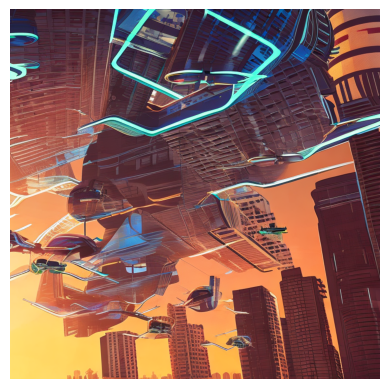

3D model saved as output_3d_model.glb


In [24]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt
from trellis.representations.mesh.flexicubes import FlexiCubes
import trimesh

# Step 1: Generate image from text
model_id = "stabilityai/stable-diffusion-2"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")

prompt = "A futuristic city with flying cars at sunset, cyberpunk style"
image = pipe(prompt).images[0]
image.save("generated_image.png")

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

# Step 2: Convert image to 3D using FlexiCubes
flexicubes = FlexiCubes()

# Example vertices and faces (replace with actual image-to-3D logic)
vertices = [[0, 0, 0], [1, 0, 0], [0, 1, 0]]
faces = [[0, 1, 2]]

# Generate the mesh
mesh_data = flexicubes.generate_mesh(vertices, faces)

# Convert the mesh data to a trimesh object
mesh = trimesh.Trimesh(vertices=mesh_data['vertices'], faces=mesh_data['faces'])

# Step 3: Export the 3D mesh as a GLB file
mesh.export("output_3d_model.glb")
print("3D model saved as output_3d_model.glb")